<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
!pip install psycopg2

In [22]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 

query = ''' SELECT * 
            FROM dash_visits
        '''

In [10]:
dash_visits = pd.io.sql.read_sql(query, con = engine) 
dash_visits

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1


In [11]:
dash_visits.to_csv('dash_visits.csv')

In [16]:
topics=dash_visits.groupby('source_topic')['visits'].sum().reset_index().sort_values(by = 'visits', ascending = False)
topics

,source_topic,visits
20,Семейные отношения,33309
17,Россия,29831
12,Полезные советы,27412
15,Путешествия,24124
5,Знаменитости,23945
9,Кино,20084
2,Дети,15243
8,История,14628
21,Семья,13896
4,Здоровье,12831


Text(0, 0.5, 'Темы карточек')

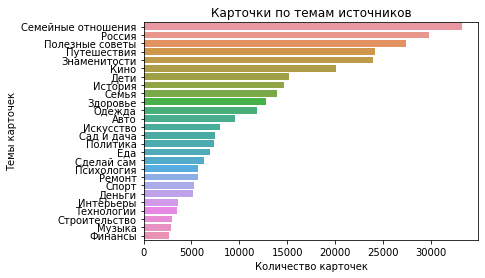

In [31]:
a1 = sns.barplot(x='visits', y='source_topic', data=topics) 
a1.set_title('Карточки по темам источников')
a1.set_xlabel('Количество карточек')
a1.set_ylabel('Темы карточек')